# Imports and load data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [15]:
products = pd.read_csv('products.csv')

In [2]:
df = pd.read_csv('DF.csv')

In [3]:
products.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

product_id  order_number  user_id  order_dow  order_hour  \
0        3376            51   140506          1          13   
1       29474             8    58308          6          16   
2       35951            99    14437          2          10   
3        8518             5   169983          0           5   
4       28398            25   147318          0           9   

   order_days_since_prior  future_buy  
0                       3           0  
1                      17           0  
2                       5           0  
3                       5           0  
4                       3           0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 7 columns):
product_id                int64
order_number              int64
user_id                   int64
order_dow                 int64
order_hour                int64
order_days_since_prior    int64
future_buy                int64
dtypes: int64(7)
memory usage: 1.7 GB


In [26]:
df.shape

(32434489, 7)

In [7]:
prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')

In [39]:
prior.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [38]:
orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

# our dataframe is too big, so we will use only part of it

** there are 206209 users:**

In [12]:
len(df.user_id.unique())

206209

** for simplification, we will use 5000 users **

In [28]:
new_df=df[df['user_id']<=5000]

In [29]:
new_df.shape

(761750, 7)

In [31]:
new_df.to_csv('DF.csv')

In [20]:
df = pd.read_csv('DF.csv')

In [21]:
df = df.drop('Unnamed: 0',axis=1)

In [22]:
df.head()

product_id  order_number  user_id  order_dow  order_hour  \
0       24838            13     2443          6          12   
1       18444            42     3985          2          22   
2       34466             4      955          5          16   
3        2314             4     1947          0          14   
4       27695             6     2578          5           9   

   order_days_since_prior  future_buy  
0                       8           0  
1                       4           0  
2                      30           1  
3                      30           0  
4                      11           1

# now, lets add some features

**add column of weekend/weekday**

In [23]:
df['weekend']=(df['order_dow']==1) | (df['order_dow']==0)

In [24]:
df = df[['product_id','order_number','user_id','order_dow','order_hour','order_days_since_prior','weekend','future_buy']]

In [25]:
df.head()

product_id  order_number  user_id  order_dow  order_hour  \
0       24838            13     2443          6          12   
1       18444            42     3985          2          22   
2       34466             4      955          5          16   
3        2314             4     1947          0          14   
4       27695             6     2578          5           9   

   order_days_since_prior  weekend  future_buy  
0                       8    False           0  
1                       4    False           0  
2                      30    False           1  
3                      30     True           0  
4                      11    False           1

**add column of time in the day**

In [26]:
def time_in_day (hour):
    if (hour>=5) & (hour<=12):
        return 'Morning'
    if (hour>12) & (hour<=17):
        return 'Afternoon'
    if (hour>15) & (hour<=21):
        return 'Evening' 
    return 'Night'

In [27]:
new_col = df['order_hour'].apply(lambda x: time_in_day(x))

In [28]:
df.insert( 7,'part_of_day',new_col)

In [29]:
df.head()

product_id  order_number  user_id  order_dow  order_hour  \
0       24838            13     2443          6          12   
1       18444            42     3985          2          22   
2       34466             4      955          5          16   
3        2314             4     1947          0          14   
4       27695             6     2578          5           9   

   order_days_since_prior  weekend part_of_day  future_buy  
0                       8    False     Morning           0  
1                       4    False       Night           0  
2                      30    False   Afternoon           1  
3                      30     True   Afternoon           0  
4                      11    False     Morning           1

**add aisle and department ids**

In [30]:
def get_aisle_by_product_id (product_id):
    return products[products['product_id']==product_id]['aisle_id'].unique()[0]

In [33]:
new_col = df['product_id'].apply(lambda x: get_aisle_by_product_id(x))

In [37]:
df.insert( 8,'aisle_id',new_col)

In [39]:
def get_department_by_product_id (product_id):
    return products[products['product_id']==product_id]['department_id'].unique()[0]

In [40]:
new_col = df['product_id'].apply(lambda x: get_department_by_product_id(x))

In [43]:
df.insert( 9,'department_id',new_col)

In [44]:
df.head()

product_id  order_number  user_id  order_dow  order_hour  \
0       24838            13     2443          6          12   
1       18444            42     3985          2          22   
2       34466             4      955          5          16   
3        2314             4     1947          0          14   
4       27695             6     2578          5           9   

   order_days_since_prior  weekend part_of_day  aisle_id  department_id  \
0                       8    False     Morning        91             16   
1                       4    False       Night         3             19   
2                      30    False   Afternoon       116              1   
3                      30     True   Afternoon       108             16   
4                      11    False     Morning       106             12   

   future_buy  
0           0  
1           0  
2           1  
3           0  
4           1

In [45]:
df.to_csv('DF.csv')

# Exploratory Data Analysis

**lets see what is the propapility that a user will buy the same product in the next order**

In [124]:
df['future_buy'].mean()

0.27460846734492944

**now lets see what product is most often reorderd:**

In [125]:
by_product_mean=df.groupby('product_id').mean()
by_product_mean.head()

order_number      user_id  order_dow  order_hour  \
product_id                                                     
1              11.169492  2043.237288   1.898305   13.101695   
3              14.375000  1706.125000   4.125000   14.625000   
4               4.444444  3240.777778   3.333333   14.666667   
7              17.000000  3612.000000   0.000000    3.000000   
9               8.222222  1281.888889   2.111111   14.555556   

            order_days_since_prior   weekend  aisle_id  department_id  \
product_id                                                              
1                        64.610169  0.525424      61.0           19.0   
3                        66.750000  0.125000      94.0            7.0   
4                        98.777778  0.222222      38.0            1.0   
7                         1.000000  1.000000      98.0            7.0   
9                        11.222222  0.444444     120.0           16.0   

            future_buy  
product_id              
1             0.322034  
3             0.750000  
4             0.000000  
7             0.000000  
9             0.333333

In [134]:
#by_product_mean=by_product_mean.sort(['future_buy'],ascending=False)
by_product_mean=by_product_mean.sort_values(by='future_buy',ascending=False)
test1=by_product_mean.head(10)
test1

order_number  user_id  order_dow  order_hour  \
product_id                                                 
13592                6.0   4089.0   2.666667   17.000000   
44888               23.0   2473.0   2.333333   12.222222   
22929               11.5   4616.0   4.500000   12.500000   
12839               45.0   3985.0   1.000000   20.000000   
13036                2.0   3008.0   2.666667   20.000000   
47024               12.5    125.0   3.000000   14.000000   
6284                31.5    187.0   1.500000   14.500000   
13713               18.0   4258.0   3.000000   20.000000   
31089                6.0   4798.0   5.000000    7.000000   
43907                5.0   1656.0   2.000000   13.000000   

            order_days_since_prior   weekend  aisle_id  department_id  \
product_id                                                              
13592                    27.666667  0.333333     100.0           21.0   
44888                     9.555556  0.222222      83.0            4.0   
22929                    20.500000  0.000000      49.0           12.0   
12839                     4.000000  1.000000     112.0            3.0   
13036                   139.666667  0.333333      45.0           19.0   
47024                     9.000000  0.000000      23.0           19.0   
6284                     11.500000  0.500000      41.0            8.0   
13713                     6.000000  0.000000      25.0           11.0   
31089                    12.000000  0.000000       9.0            9.0   
43907                    14.000000  0.000000      90.0            7.0   

            future_buy  
product_id              
13592              1.0  
44888              1.0  
22929              1.0  
12839              1.0  
13036              1.0  
47024              1.0  
6284               1.0  
13713              1.0  
31089              1.0  
43907              1.0

In [130]:
def productId2String(x):
    return products[products['product_id']==x]['product_name'].unique()[0]
def probOfProduct(x): #for all users
    return df[df['product_id'] == x]['future_buy'].mean()

In [135]:
test=test1.rename(lambda x: productId2String(x))
test

order_number  user_id  \
product_id                                                                  
Frothed Milk & Cold Pressed Espresso Draft Latte             6.0   4089.0   
Organic Peeled Butternut Squash                             23.0   2473.0   
Dinosaur Shapes Chicken Breast Nuggets                      11.5   4616.0   
Premium Sprouted Artisan Seven-Grain Wraps                  45.0   3985.0   
Crunch Milk Chocolate with Crisped Rice Chocola...           2.0   3008.0   
Poppycock Cashew Lovers                                     12.5    125.0   
Super Clump Unscented Cat Litter                            31.5    187.0   
100% Pure Sensitive Skin Care Grape Seed Oil                18.0   4258.0   
HW ORGNCVLLE PSTSC ITL HERB                                  6.0   4798.0   
Unsweetened Lemonade                                         5.0   1656.0   

                                                    order_dow  order_hour  \
product_id                                                                  
Frothed Milk & Cold Pressed Espresso Draft Latte     2.666667   17.000000   
Organic Peeled Butternut Squash                      2.333333   12.222222   
Dinosaur Shapes Chicken Breast Nuggets               4.500000   12.500000   
Premium Sprouted Artisan Seven-Grain Wraps           1.000000   20.000000   
Crunch Milk Chocolate with Crisped Rice Chocola...   2.666667   20.000000   
Poppycock Cashew Lovers                              3.000000   14.000000   
Super Clump Unscented Cat Litter                     1.500000   14.500000   
100% Pure Sensitive Skin Care Grape Seed Oil         3.000000   20.000000   
HW ORGNCVLLE PSTSC ITL HERB                          5.000000    7.000000   
Unsweetened Lemonade                                 2.000000   13.000000   

                                                    order_days_since_prior  \
product_id                                                                   
Frothed Milk & Cold Pressed Espresso Draft Latte                 27.666667   
Organic Peeled Butternut Squash                                   9.555556   
Dinosaur Shapes Chicken Breast Nuggets                           20.500000   
Premium Sprouted Artisan Seven-Grain Wraps                        4.000000   
Crunch Milk Chocolate with Crisped Rice Chocola...              139.666667   
Poppycock Cashew Lovers                                           9.000000   
Super Clump Unscented Cat Litter                                 11.500000   
100% Pure Sensitive Skin Care Grape Seed Oil                      6.000000   
HW ORGNCVLLE PSTSC ITL HERB                                      12.000000   
Unsweetened Lemonade                                             14.000000   

                                                     weekend  aisle_id  \
product_id                                                               
Frothed Milk & Cold Pressed Espresso Draft Latte    0.333333     100.0   
Organic Peeled Butternut Squash                     0.222222      83.0   
Dinosaur Shapes Chicken Breast Nuggets              0.000000      49.0   
Premium Sprouted Artisan Seven-Grain Wraps          1.000000     112.0   
Crunch Milk Chocolate with Crisped Rice Chocola...  0.333333      45.0   
Poppycock Cashew Lovers                             0.000000      23.0   
Super Clump Unscented Cat Litter                    0.500000      41.0   
100% Pure Sensitive Skin Care Grape Seed Oil        0.000000      25.0   
HW ORGNCVLLE PSTSC ITL HERB                         0.000000       9.0   
Unsweetened Lemonade                                0.000000      90.0   

                                                    department_id  future_buy  
product_id                                                                     
Frothed Milk & Cold Pressed Espresso Draft Latte             21.0         1.0  
Organic Peeled Butternut Squash                               4.0         1.0  
Dinosaur Shapes Chicken Breast Nuggets                  

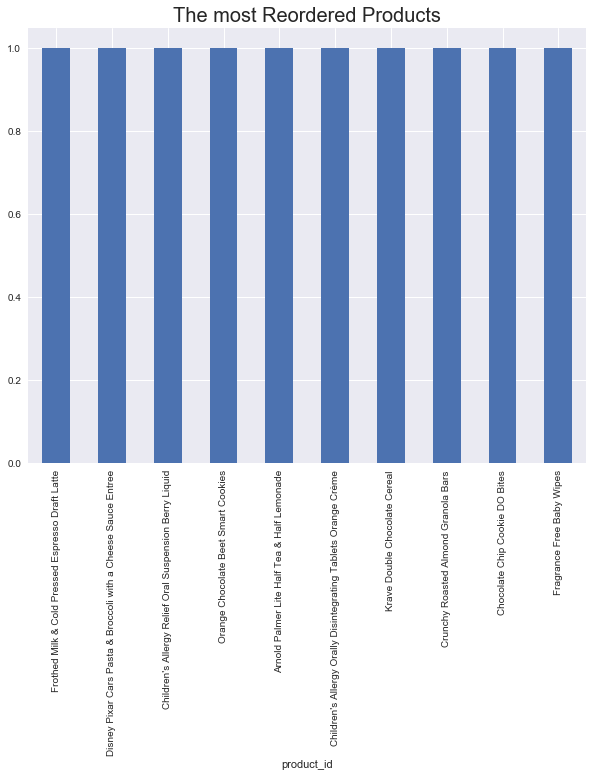

In [132]:
plt.rcParams["figure.figsize"] = [10,8]
test['future_buy'].plot.bar()
plt.title('The most Reordered Products',fontsize=20)

**now lets see how many times these products were bought:**

In [136]:
test1['times_ordered']=test1.apply(lambda x:len(df[df['product_id']==x.name]),axis=1)

C:\Users\eden\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [137]:
test=test1.rename(lambda x: productId2String(x))

In [138]:
test

order_number  user_id  \
product_id                                                                  
Frothed Milk & Cold Pressed Espresso Draft Latte             6.0   4089.0   
Organic Peeled Butternut Squash                             23.0   2473.0   
Dinosaur Shapes Chicken Breast Nuggets                      11.5   4616.0   
Premium Sprouted Artisan Seven-Grain Wraps                  45.0   3985.0   
Crunch Milk Chocolate with Crisped Rice Chocola...           2.0   3008.0   
Poppycock Cashew Lovers                                     12.5    125.0   
Super Clump Unscented Cat Litter                            31.5    187.0   
100% Pure Sensitive Skin Care Grape Seed Oil                18.0   4258.0   
HW ORGNCVLLE PSTSC ITL HERB                                  6.0   4798.0   
Unsweetened Lemonade                                         5.0   1656.0   

                                                    order_dow  order_hour  \
product_id                                                                  
Frothed Milk & Cold Pressed Espresso Draft Latte     2.666667   17.000000   
Organic Peeled Butternut Squash                      2.333333   12.222222   
Dinosaur Shapes Chicken Breast Nuggets               4.500000   12.500000   
Premium Sprouted Artisan Seven-Grain Wraps           1.000000   20.000000   
Crunch Milk Chocolate with Crisped Rice Chocola...   2.666667   20.000000   
Poppycock Cashew Lovers                              3.000000   14.000000   
Super Clump Unscented Cat Litter                     1.500000   14.500000   
100% Pure Sensitive Skin Care Grape Seed Oil         3.000000   20.000000   
HW ORGNCVLLE PSTSC ITL HERB                          5.000000    7.000000   
Unsweetened Lemonade                                 2.000000   13.000000   

                                                    order_days_since_prior  \
product_id                                                                   
Frothed Milk & Cold Pressed Espresso Draft Latte                 27.666667   
Organic Peeled Butternut Squash                                   9.555556   
Dinosaur Shapes Chicken Breast Nuggets                           20.500000   
Premium Sprouted Artisan Seven-Grain Wraps                        4.000000   
Crunch Milk Chocolate with Crisped Rice Chocola...              139.666667   
Poppycock Cashew Lovers                                           9.000000   
Super Clump Unscented Cat Litter                                 11.500000   
100% Pure Sensitive Skin Care Grape Seed Oil                      6.000000   
HW ORGNCVLLE PSTSC ITL HERB                                      12.000000   
Unsweetened Lemonade                                             14.000000   

                                                     weekend  aisle_id  \
product_id                                                               
Frothed Milk & Cold Pressed Espresso Draft Latte    0.333333     100.0   
Organic Peeled Butternut Squash                     0.222222      83.0   
Dinosaur Shapes Chicken Breast Nuggets              0.000000      49.0   
Premium Sprouted Artisan Seven-Grain Wraps          1.000000     112.0   
Crunch Milk Chocolate with Crisped Rice Chocola...  0.333333      45.0   
Poppycock Cashew Lovers                             0.000000      23.0   
Super Clump Unscented Cat Litter                    0.500000      41.0   
100% Pure Sensitive Skin Care Grape Seed Oil        0.000000      25.0   
HW ORGNCVLLE PSTSC ITL HERB                         0.000000       9.0   
Unsweetened Lemonade                                0.000000      90.0   

                                                    department_id  future_buy  \
product_id                                                                      
Frothed Milk & Cold Pressed Espresso Draft Latte             21.0         1.0   
Organic Peeled Butternut Squash                               4.0         1.0   
Dinosaur Shapes Chicken Breast Nuggets              

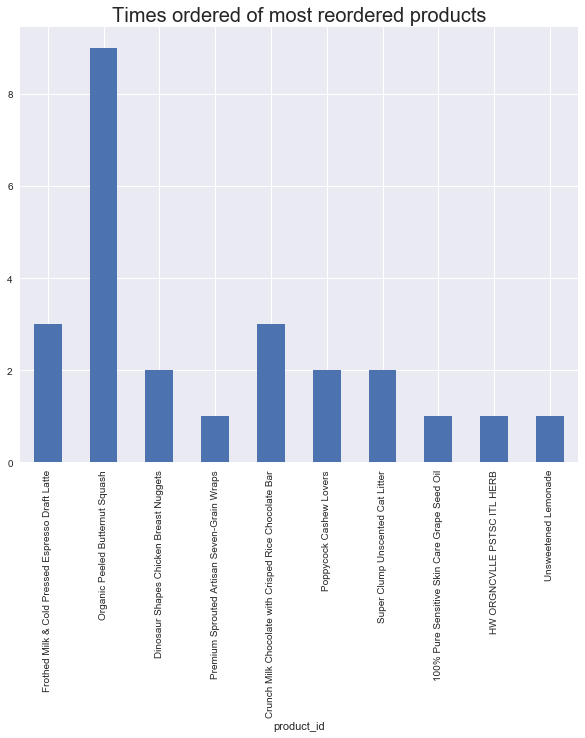

In [139]:
plt.rcParams["figure.figsize"] = [10,8]
test['times_ordered'].plot.bar()
plt.title('Times ordered of most reordered products',fontsize=20)